In [ ]:
'''
    LINKS REVISADOS CON EXPLICACIONES DE LA LIBRERIA sklearn.neighbors
    
    http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
    http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py
    http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score
'''

In [2]:
'''
    PAQUETES UTILIZADOS
'''
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
'''
    OBTENCION DE LOS CONJUNTOS DE DATOS Y DE VALORES OBJETIVO
'''
# Lectura de la base de datos
base = pd.read_csv('OnlineNewsPopularity.csv', sep=",")
# Subconjunto: 1000 observaciones originales
base2 = base[0:10000]

# Copia de la base sin la primer columna ('url', atributo no predictivo) y sin la variable objetivo
# Matriz de entrenamiento
base_X = base2.drop(base.columns[[0,1,len(base2.columns)-1]], axis=1)

# Arreglo de valores objetivo (columna de valores objetivo 'shares')
base_y = np.asarray(base2[base2.columns[len(base2.columns)-1]].tolist())

In [4]:
'''
    OBTENCION DE LOS SUBCONJUNTOS DE ENTRENAMIENTO Y DE PRUEBA
'''
# Obtenemos dos subconjuntos de datos (75% para entrenamiento, 25% para prueba)
# len(X_train) = len(y_train) = 750
# len(X_test) = len(y_test) = 250
# Los índices de ambos conjuntos (train o test) se corresponden de acuerdo a la base de datos original
X_train, X_test, y_train, y_test = train_test_split(base_X, base_y, test_size=0.25)

In [5]:
'''
    EJECUCION DEL ALGORITMO PARA ENTRENAR LOS DATOS
'''
# Creación de una instancia de 'Neighbours Classifier'
# Sin atributos, se analizan los datos y se eligen la mejor forma de obtener los k-vecinos
neigh = KNeighborsClassifier()
#neigh = KNeighborsClassifier(n_neighbors=8, weights='distance', algorithm='auto', n_jobs=-1)

# Entrenamiento de los datos
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
'''
    PREDICCION CON EL SUBCONJUNTO DE PRUEBA
'''
# Predicción de valores objetivo con el conjunto de prueba
# En teoría, X_test debería ser igual a y_test
X_predict = neigh.predict(X_test)
print X_predict

[ 469  535  772 ..., 1500 1200  300]


In [7]:
print y_test

[  850  1100   863 ..., 12300  1400  6600]


In [8]:
# Exactitud promedio de la predicción <<<<<<------- ¿?
accuracy = neigh.score(X_test, y_test)
print 'E: ', accuracy

E:  0.0152


In [11]:
def error_fn(X_predict, y_test):
    i = 0
    yei = 0
    for i in range(len(X_predict)):
        if np.absolute(X_predict[i] - y_test[i]) < 500:
            yei = yei + 1
    return yei/float(len(X_predict))

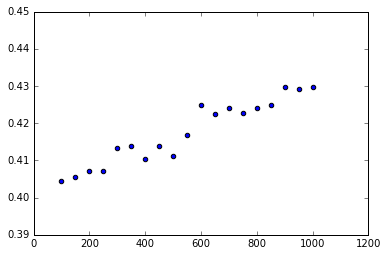

In [12]:
err_arr = []
arr = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
for i in arr:
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_train,y_train)
    X_predict = neigh.predict(X_test)
    err = error_fn(X_predict, y_test)
    err_arr.append(err)
plt.scatter(arr, err_arr)